# 3 Integrals and Derivatives
## Fundamental methods for integrals
Trapezoidal rule

$I(a,b) = \int_a^b f(x) dx$
We divide the interval from a to b in N slices each with a width $h = (b-a) / N$. Then, we form a trapezoid for the kth slice, joining a+kh, a + (k-1)h,  f(a+kh), f(a+(k-1)h). <br>
Then, the area of the trapezoid is:
$A_k = \dfrac{1}{2} h [f(a+(k-1)h) + f(a+kh)]$

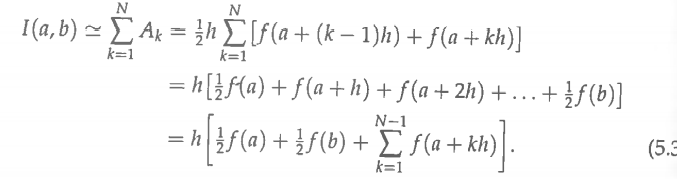

In [1]:
# Example
import numpy as np
import scipy.integrate as integrate


def f(x):
    return x**4 - 2*x + 1

N = 10
a=0
b=2
h = (b-a)/N
s= 0.5*f(a) + 0.5*f(b)

for k in range(1,N):
    s+=f(a+k*h)
print(h*s)

# the correct answer is 4.4
res = integrate.quad(lambda x: x**4 - 2*x+1,0,2)
print(res)

4.50656
(4.3999999999999995, 5.003996496050337e-14)


##### Simpson's Rule

We approximate the function with quadratics passing through 3 points. Suppose the spacing is h. 
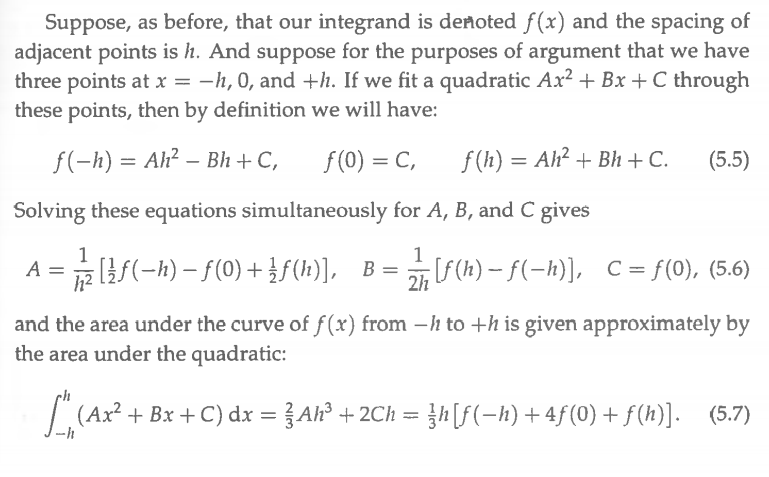

Then, we have that $I(a,b)$ is the sum of this type of terms:

$I(a,b) \simeq \dfrac{1}{3} h[f(a) + 4f(a+h) + f(a+2h)] + \dfrac{1}{3} h [f(a+2h) + 4 f(a+3h) + f(a+4h)] + \cdots + \dfrac{1}{3} h [f(a + (N-2)h) + 4 f(a + (N-1)h) + f(b)]$

Collecting terms, we have:

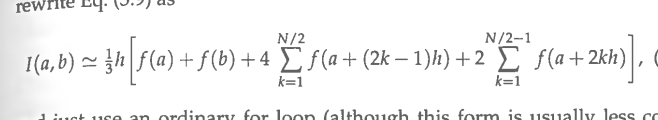

In [2]:
import numpy as np
import scipy.integrate as integrate


def f(x):
    return x**4 - 2*x + 1



N = 10
a=0
b=2

def simpson(f,a,b,N):

    h = (b-a)/N
    s= f(a) + f(b)

    for k in range(1,int(N//2)):
        s+= 4* f(a+(2*k-1)*h) + 2*f(a+2*k*h)
    s += 4*f(a+(N-1)*h)
    return(h*s*1/3)

print(simpson(f,a,b,N))


# the correct answer is 4.4
res = integrate.quad(lambda x: x**4 - 2*x+1,0,2)
print(res)

4.400426666666668
(4.3999999999999995, 5.003996496050337e-14)


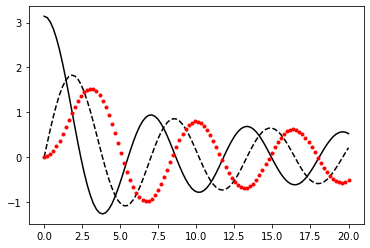

In [3]:
# Calculate J_m(x)= 1/pi * int_0^pi cos(m*t - x*sin t) dt
# write a code that calculates J_m(x)
import numpy as np
from matplotlib import pylab as plt


def J(m,x):
    def f(t):
        return np.cos(m * t - x * np.sin(t))
    return(simpson(f,0,np.pi,1000))

# plot j_0, j_1, j_2 as a function of x
x = np.linspace(0,20,100)
y0 = J(0,x)
y1 = J(1,x)
y2= J(2,x)
plt.plot(x,y0,"k-")
plt.plot(x,y1,"k--")
plt.plot(x,y2,'r.')

plt.show()

#### Errors on integrals
Simpsons rule error is of the order O(h^2)

###### Choosing the number of steps
We start with a small value of N and repeatedly double it until we achieve the accuracy we want. Then, 
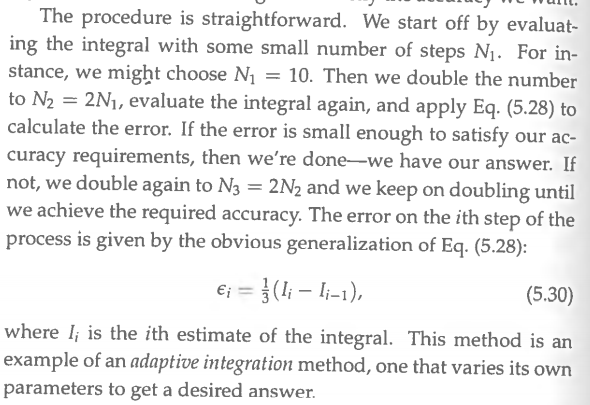

Complete steps: 
<ol>
<li> Choose an initial number of steps and a target accuracy and calculate the initial integral $I_1$.
    Also calculate $S_i = \dfrac{1}{3} [f(a) + f(b) + 2 \sum_{k even \; 2 \cdots \; N_i - 2} f(a + k h_i) ]$ <br>
    And also $T_i = \dfrac{2}{3} \sum_{k odd \; 1 \cdots N_i-1} f(a+kh_i)$
    </li>
    <li>  Double the number of steps and calculate the new value of $T_i$ using the same equation. 
    Calculate the New value fo $S$ with $S_i = S_{i-1} + T_{i-1}$ 
    And the new value of the integral $I_i= h_i (S_i + 2T_i)$ 
    </li>
    <li> Estimate the error as $\epsilon_i = \dfrac{1}{15} (I_i - I_{i-1})$, if it is less than the target accuracy for the integral, stop, otherwise repeat 2
    </li>
</ol>


##### Higher order integration methods 

In general, if we cut the interval in N slices, the general integration approximation is: $\int_a^b f(x) dx \simeq \sum_{k=1}^N w_k f(x_k)$ where:

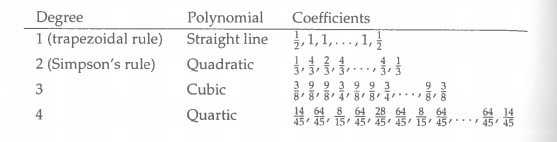

### Gaussian Quadrature
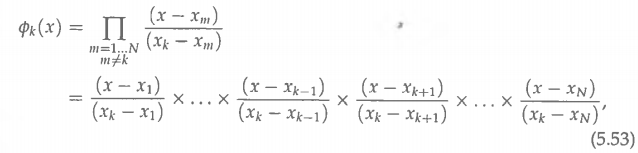
It is a polynomial of degree $N-1$ <br>

And we can see that $\phi_k (x_m) = \delta_{km}$

Now, suppose we want to approximate $f(x)$, we use:
$ \Phi(x) = \sum_{k=1}^N f(x_k) \phi_k(x)$

We can see that $\Phi(x_m) = f(x_m)$, so , $\Phi(x)$ is a polynomial of degree $N-1$ that fits the integrand $f(x)$ at all the sample points $x_k$. It has $N$ free coefficients completely determined by the points, it is the best polynomial that fits the points. \\
To calculate the integral of $f$ using this, we have:

$\int_a^b f(x) dx \simeq \int_a^b \Phi(x) dx = \int_a^b \sum_{k=1}^N f(x_k) \phi_k(x) dx = \sum_{k=1}^N f(x_k) \int_a^b \phi_k(x) dx$

So we see that, comparing to the higher order integration, we have that $w_k = \int_a^b \phi_k(x) dx$

So, given sample points, we know how to calculate the weighs ands then use them to get the approximation of the integral.

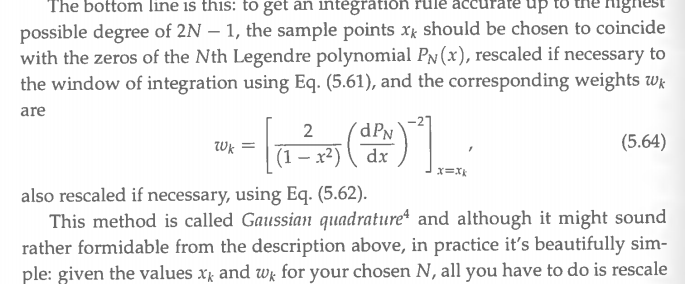

##### Integrals over infinite Ranges


In [4]:
# let us calculate I = int_0^{inf} e^{-t^2} dt
import scipy.integrate as integrate
import numpy as np

def f(z):
    return np.exp(-z**2/(1-z)**2) / (1-z)**2

res = integrate.quad(f,0,1)
print(res)

(0.886226925452758, 5.35508277725214e-09)
